In [1]:
import numpy as np

# Synergizing CRISPR/Cas9 off-target predictions for ensemble insights and practical applications

Shixiong Zhang , Xiangtao Li, Qiuzhen Lin and Ka-Chun Wong 

Department of Computer Science, City University of Hong Kong, Kowloon Tong, Hong Kong; Department of Computer Science and Information Technology, Northeast Normal University, Changchun;  China and College of Computer Science and Software Engineering, Shenzhen University, Shenzhen.

# Why

CRISPR/Cas9 could cause off-target cleave

A plethora of tools were developed to predict off-target activities

## But how does CRISPR/Cas9 decide and cleave the off-target sites?

In [25]:
from wand.image import Image as WI

def get_fig_from_page(pg, left=True, full_w=True, top=300, height=500, shrink=1):
    img = WI(filename='bty748.pdf[%i]' % pg, resolution=600)
    #print(img.size)
    if left:
        left = 500
    else:
        left = int(img.size[0]/2)
    
    if full_w:
        width = 4200
    else:
        width = 2100
        
        
    img.crop(left, top, width=width, height= height)
    
    if shrink<1:
        w, h = img.size
        img.resize(int(w*shrink), int(h*shrink))
    return img

In [3]:
def crop_fig(f, r):
    img = WI(filename=f)
    t = tuple(np.array(img.size, dtype=np.int32)-r)
    img.resize(t[0], t[1])
    return img

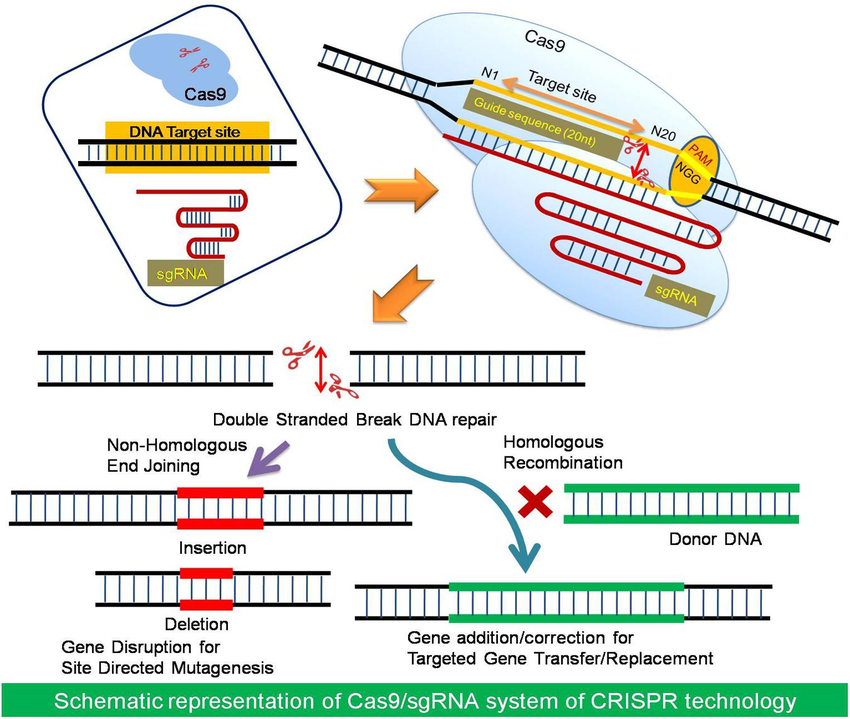

In [4]:
crop_fig('fpls-07-00506-g001.jpg', 500)

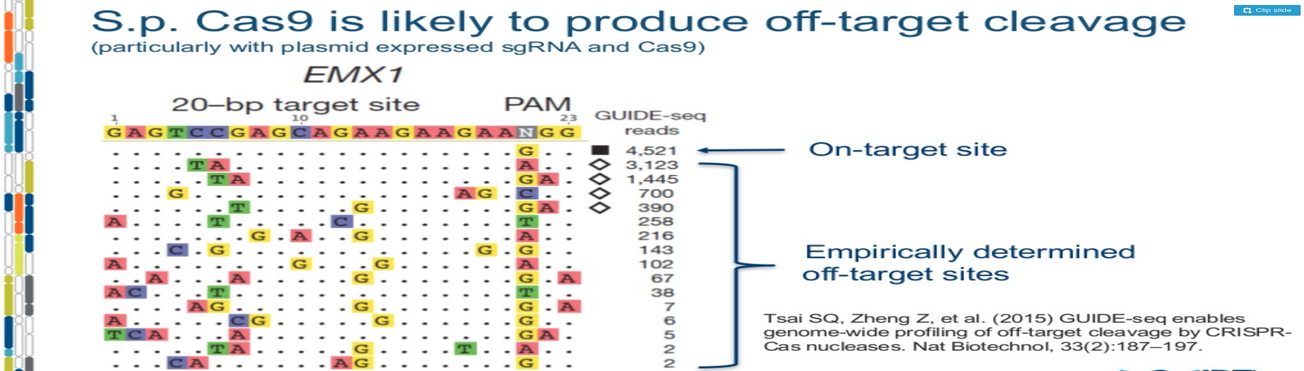

In [5]:
crop_fig('GS.png', 600)

# Significance
## Select gRNAs intelligently 
  - Know your host genome sequence
  - Learn from what has been observed to tease apart the "rule" that dictate 

# Rules of binding/cleaving 

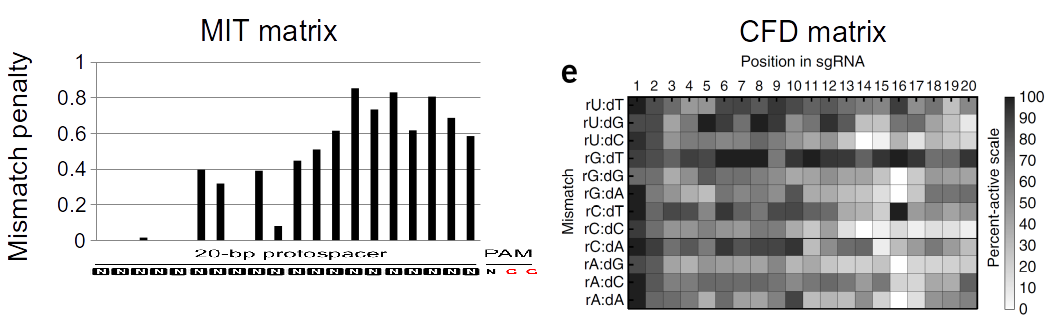

In [6]:
crop_fig('Fig_Matrices.png', 0)

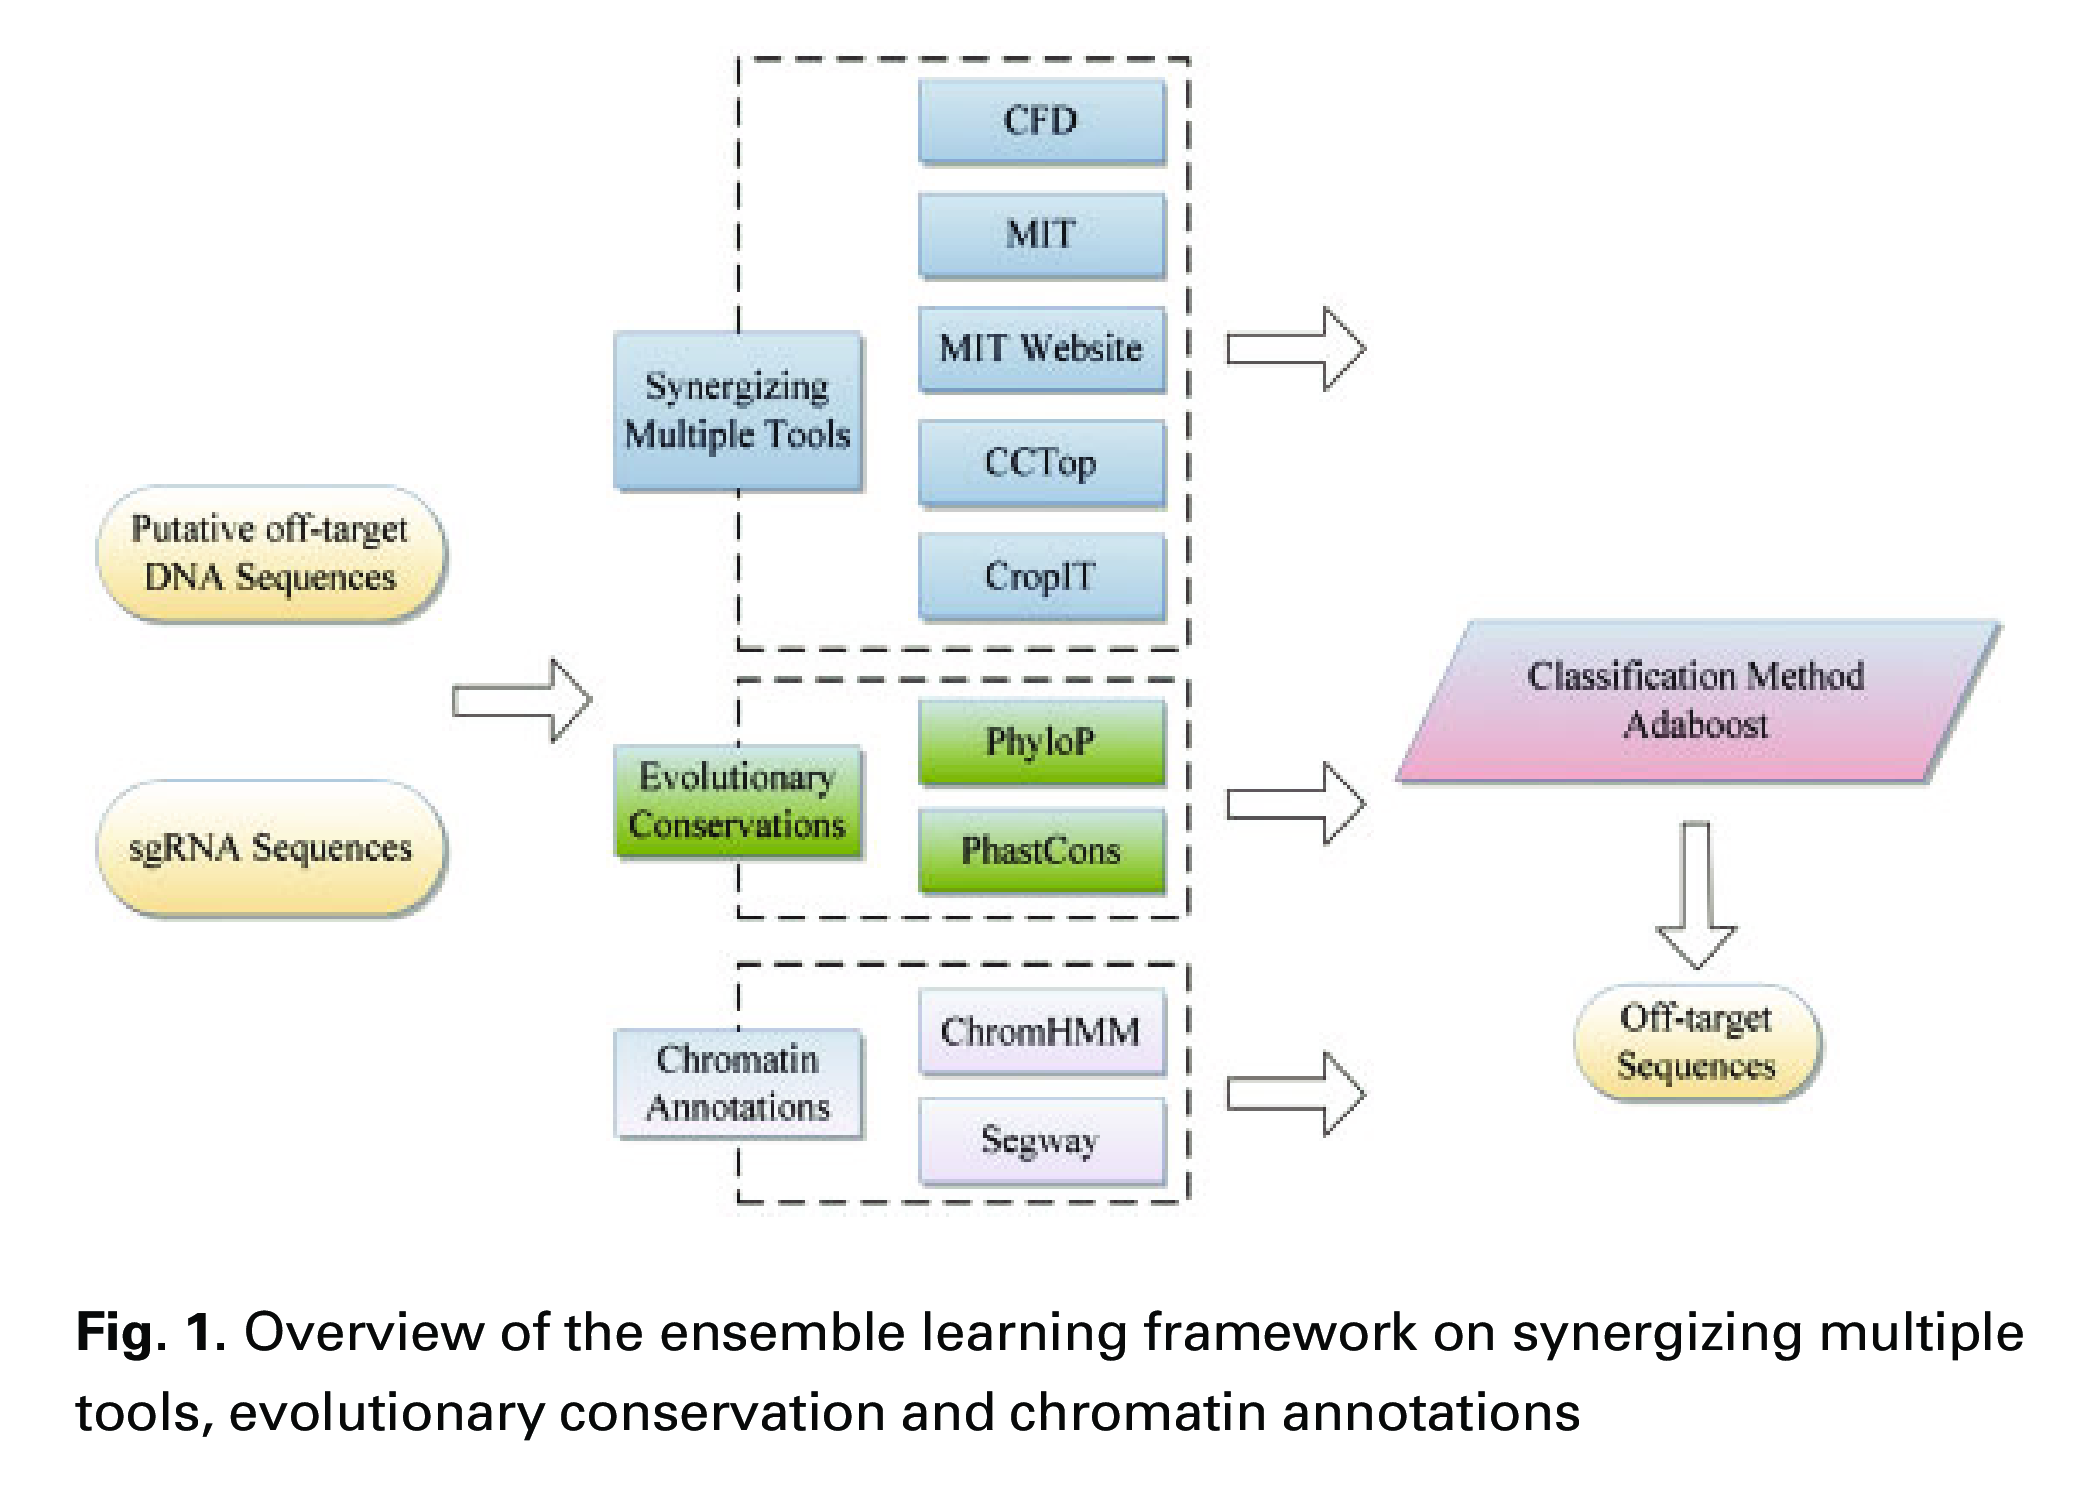

In [7]:
get_fig_from_page(1, left=False, full_w=False, top=450, height=1500)

# Datasets
## SpCas9 collected from 8 off-target studies

## 25,332 putative off-target site (<= 4 mismatches)

## Only 152/25,332 were varified off-target sites observed

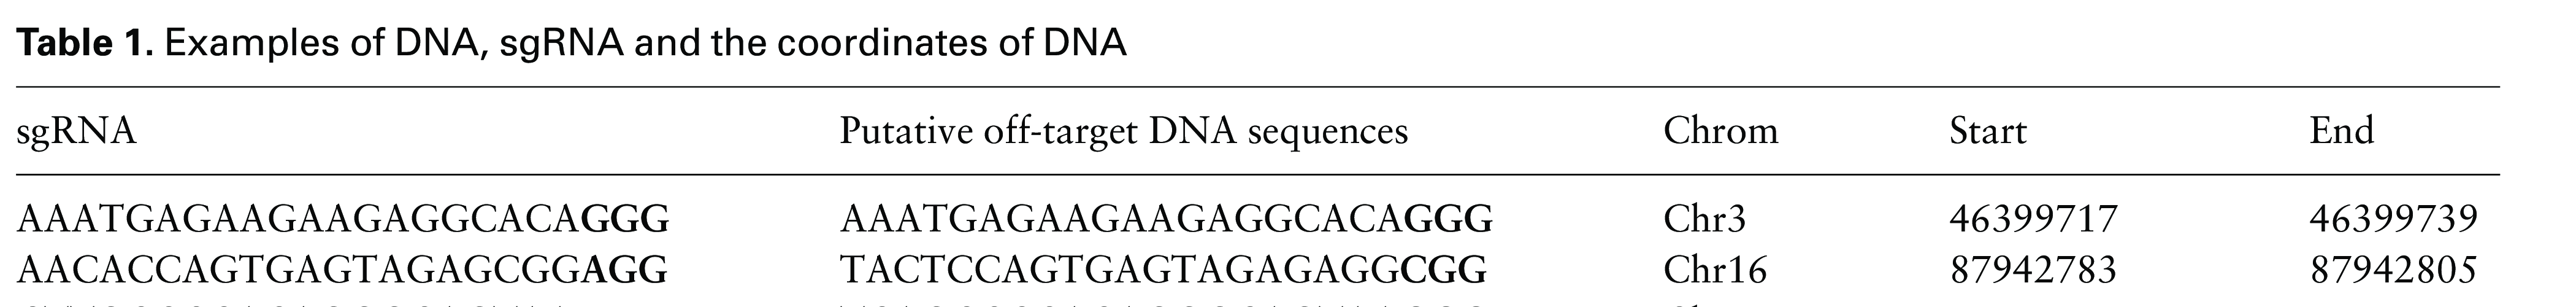

In [8]:
get_fig_from_page(2, left=True, full_w=True, top=450, height=500)

# Ensemble learning models
The use of multiple classification algorithms to enhance classification accuracy and reduce overfitting.


## Classification algirithms
  - AdaBoost
  - Random Forest
  - Multilayer Perceptron
  - Support Vector Machine
  - Decision Tree

## Features
  - Scoring methods
  - Chromatin annotation

## Support Vector Machine

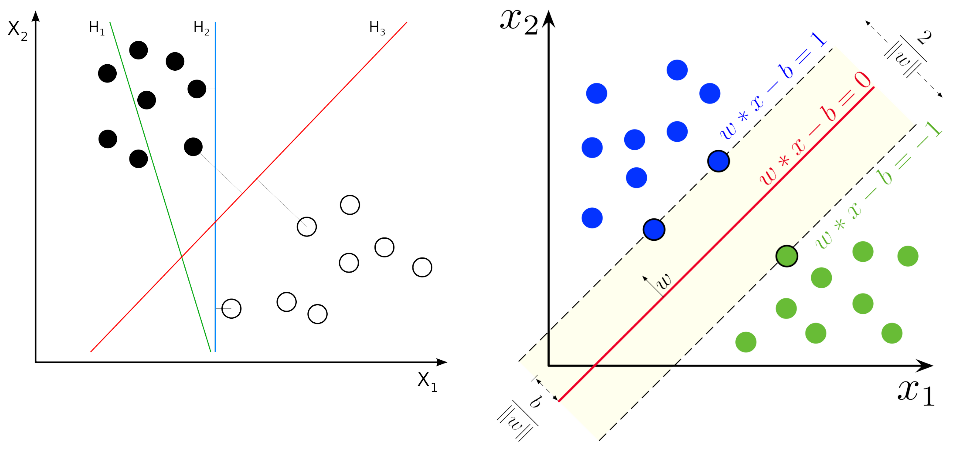

In [9]:
crop_fig('Fig_SVM.png', 0)

## AdaBoost (Adaptive Boosting)

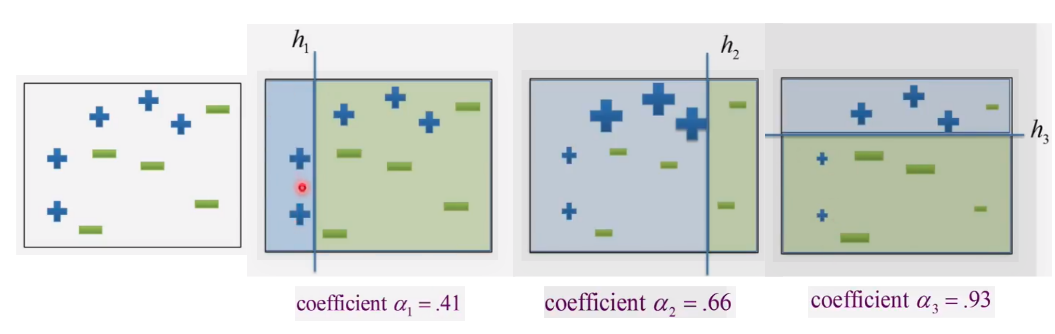

In [10]:
crop_fig('Fig_AdaNoost1.png', 0)

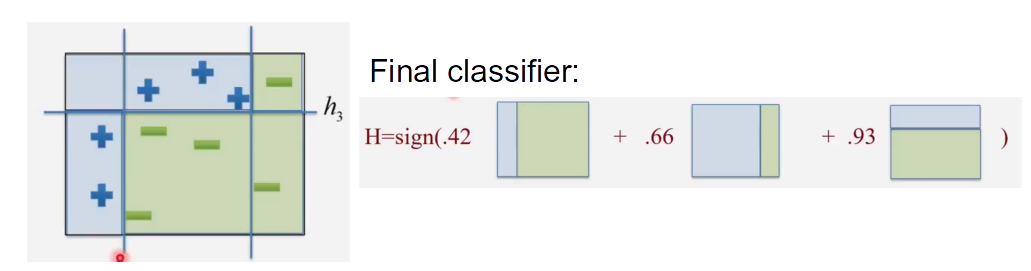

In [11]:
crop_fig('Fig_Adaboost2.png', 0)

## Decision Tree

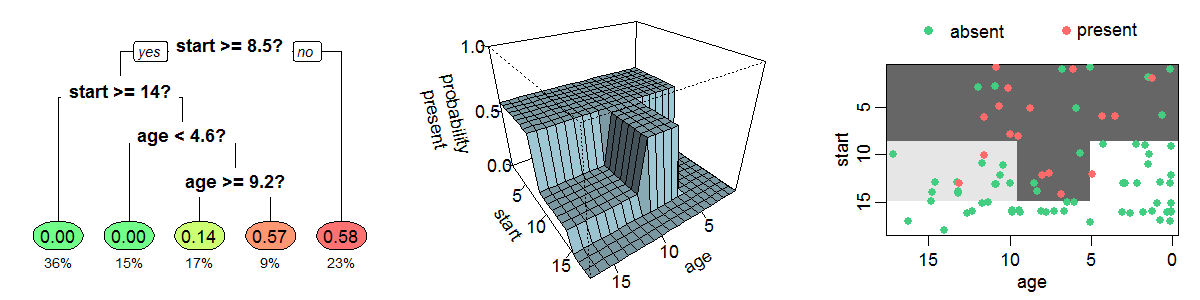

In [12]:
crop_fig('Fig_DecisionTree.png', 0)

## Random Forest

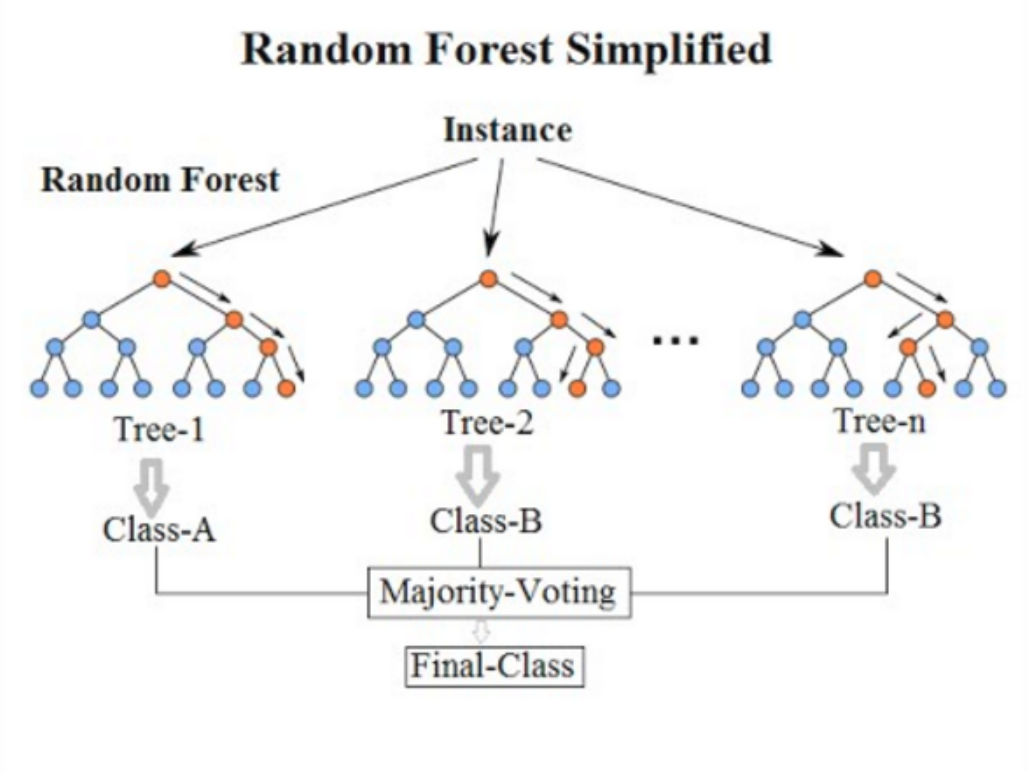

In [13]:
crop_fig('Fig_RandomForest.png', 0)

## Multilayer Perceptron

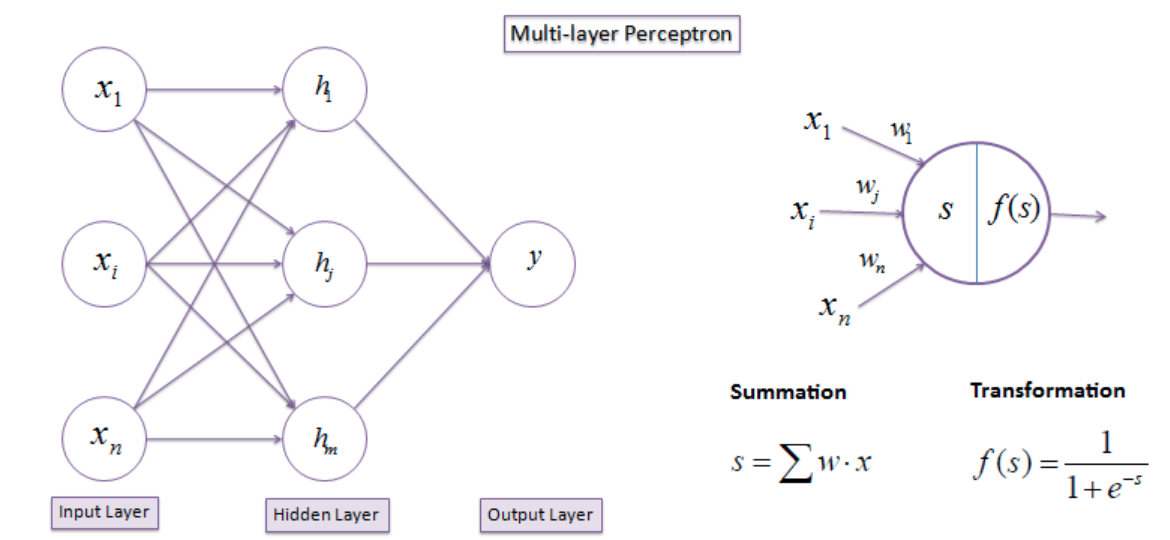

In [22]:
crop_fig('Fig_MLPintro.png', 0)

# Evaluation criteria

## Area under the receiver operating characterstic (ROC) curves (AUC-ROC)

## Area under the precision-recall curves (PRC) (AUC-PRC)

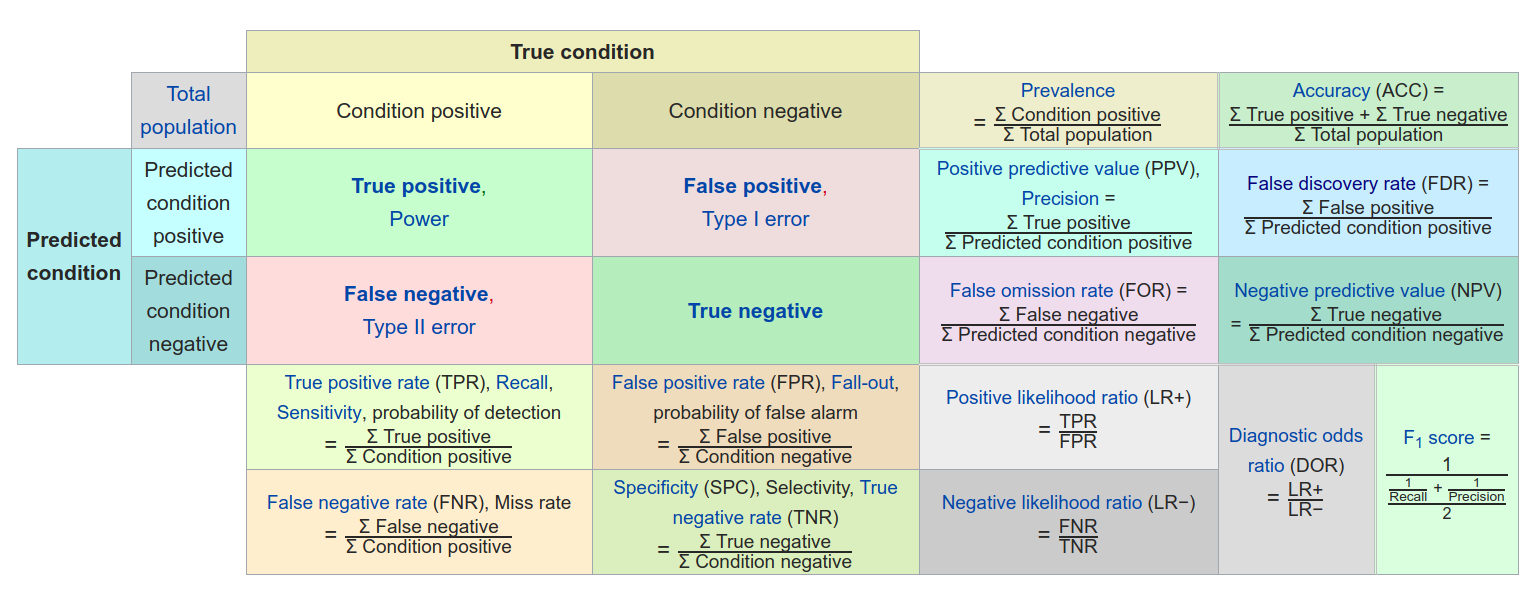

In [23]:
crop_fig('Fig_ROC_PRC.png', 0)

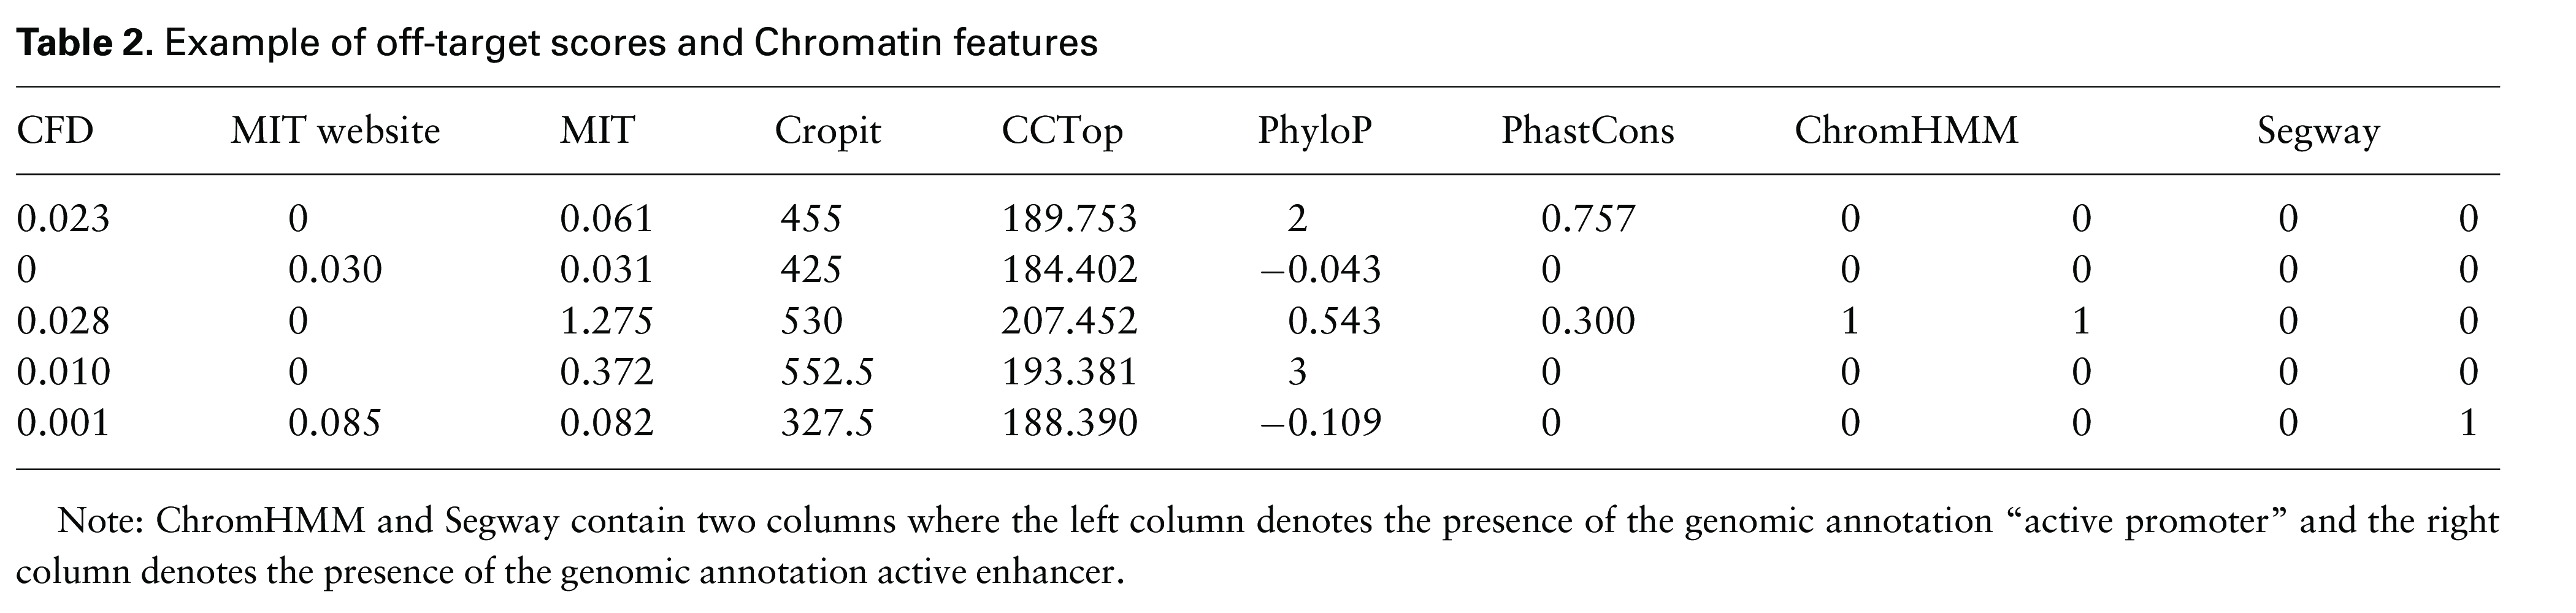

In [15]:
get_fig_from_page(3, left=True, full_w=True, top=450, height=1000)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

filename = "cdf_score999.csv"

normsocres = np.transpose(np.vstack((MITWeb, MIT, CCTop, Cropit, CFD, 
                                     phylop, phastCons, Promoter, Enhancer, segwayPromoter, segwayEnhancer)))

X_train, X_test, y_train, y_test = train_test_split(normsocres, Label, test_size=0.3, random_state=42)

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
rf = RandomForestClassifier(max_depth=1, n_estimators=200)
svc = SVC(kernel = "rbf")
svc1 = SVC(kernel = "sigmoid")

dt = DecisionTreeClassifier(max_depth=6)
mlp = MLPClassifier(alpha=1, activation="relu")
cv = StratifiedKFold(n_splits=5)

In [ ]:
for train, test in cv.split(sub_normsocres, Label):
    
    scores = bdt.fit(sub_normsocres[train], Label[train]).decision_function(sub_normsocres[test])

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Label[test], scores)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i += 1


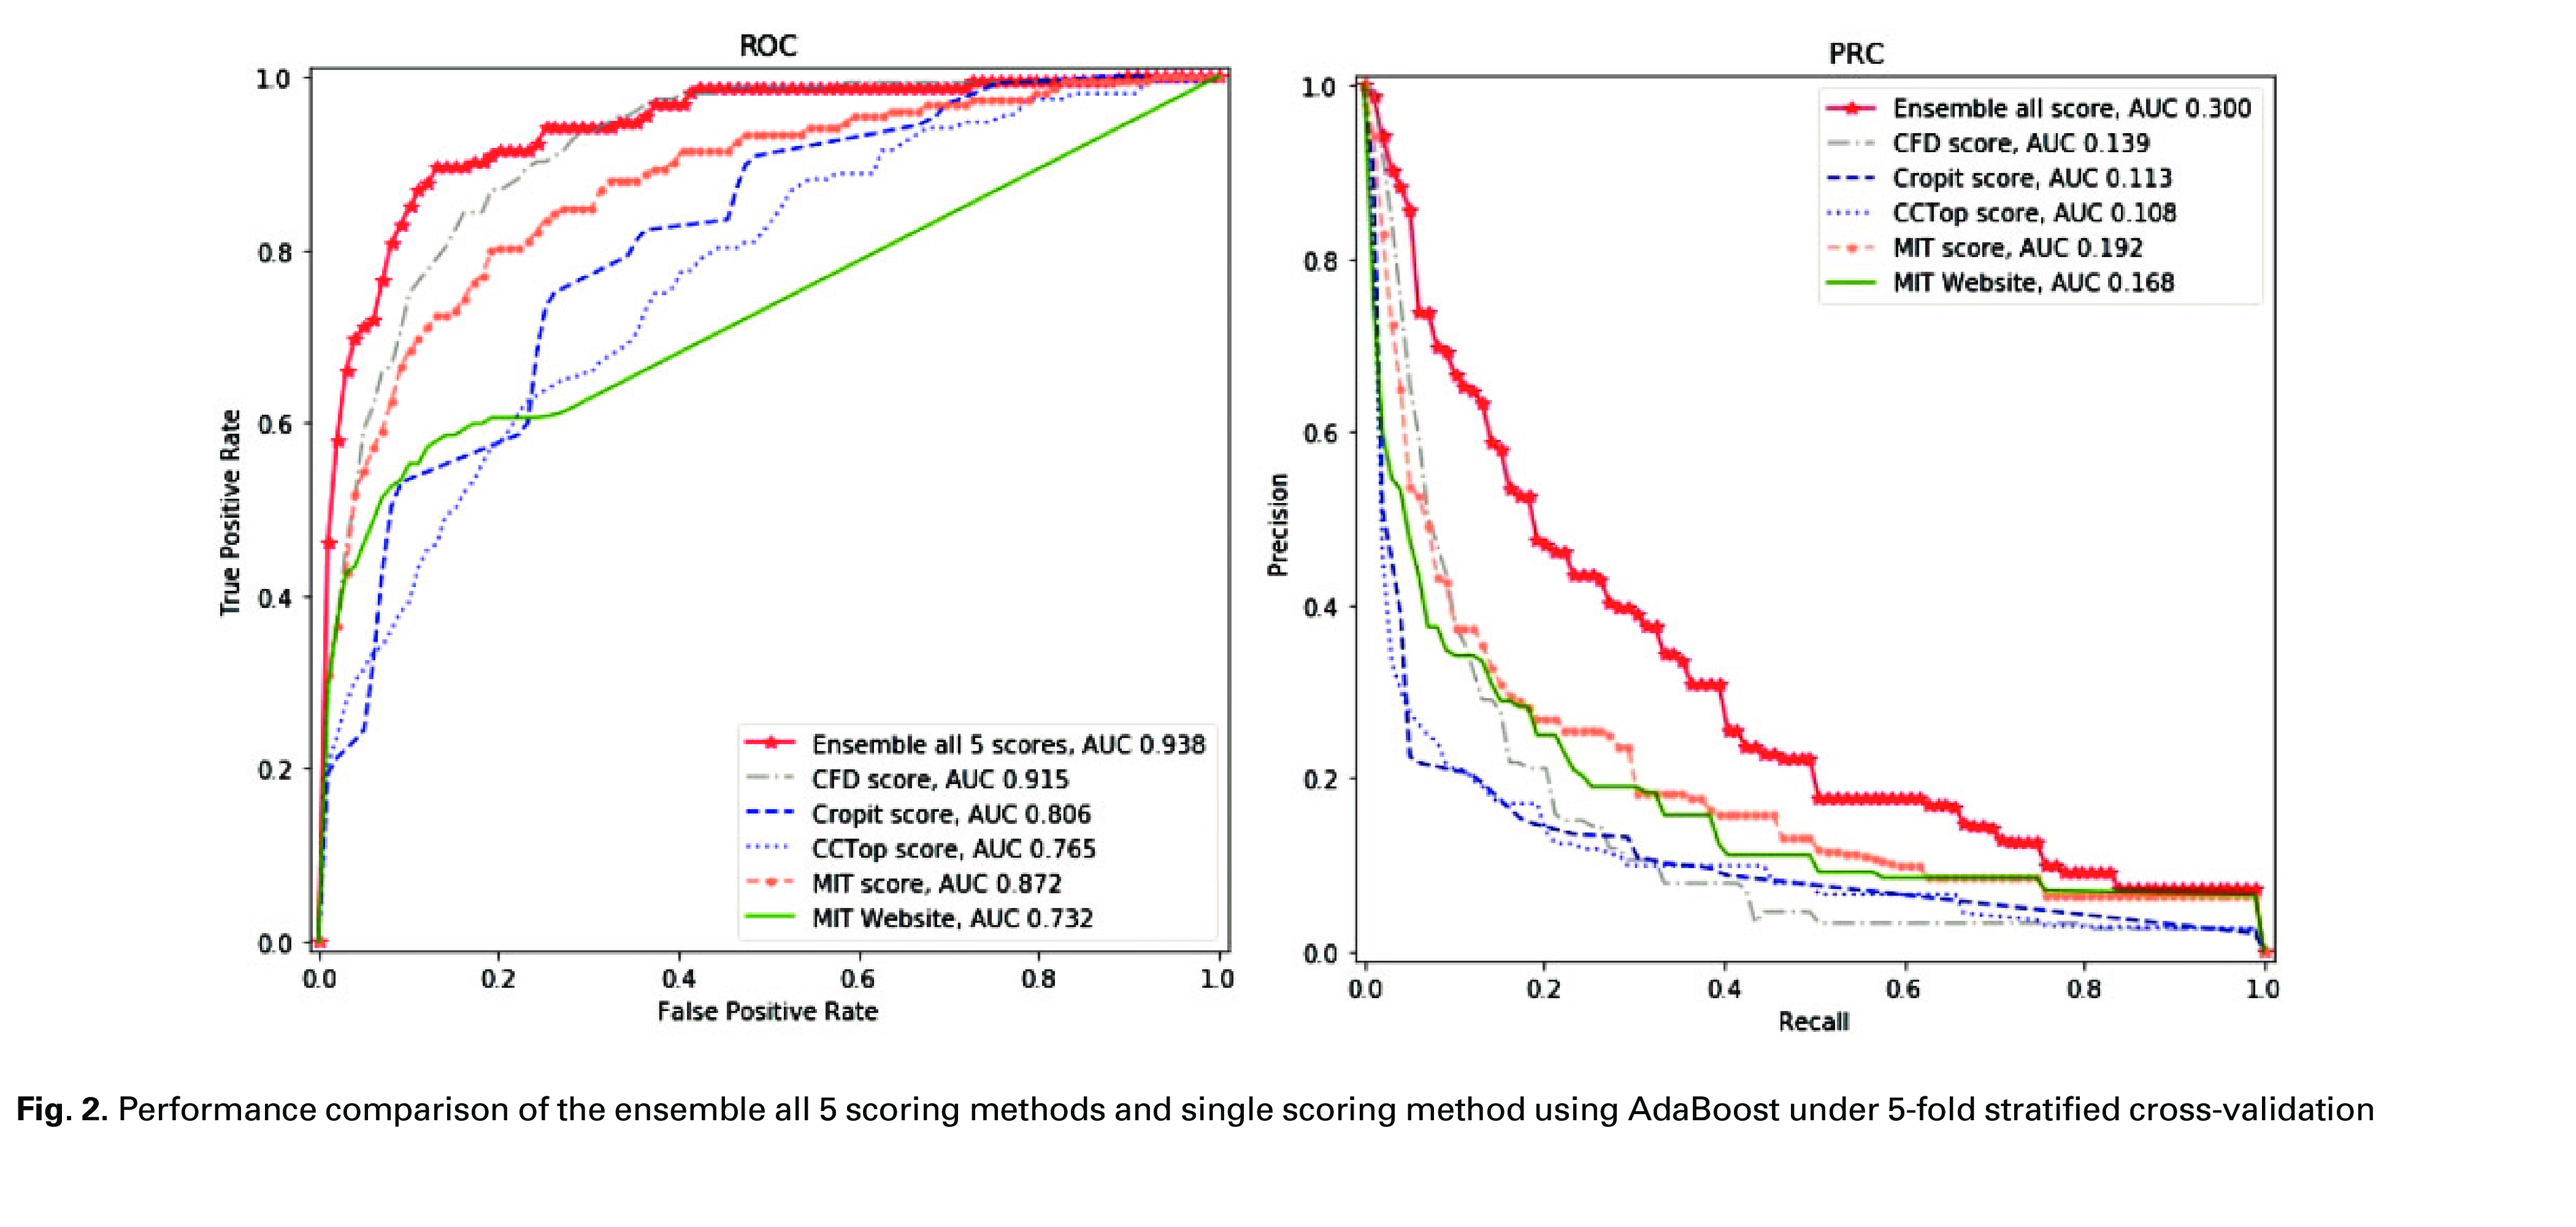

In [16]:
get_fig_from_page(4, left=True, full_w=True, top=450, height=2000)

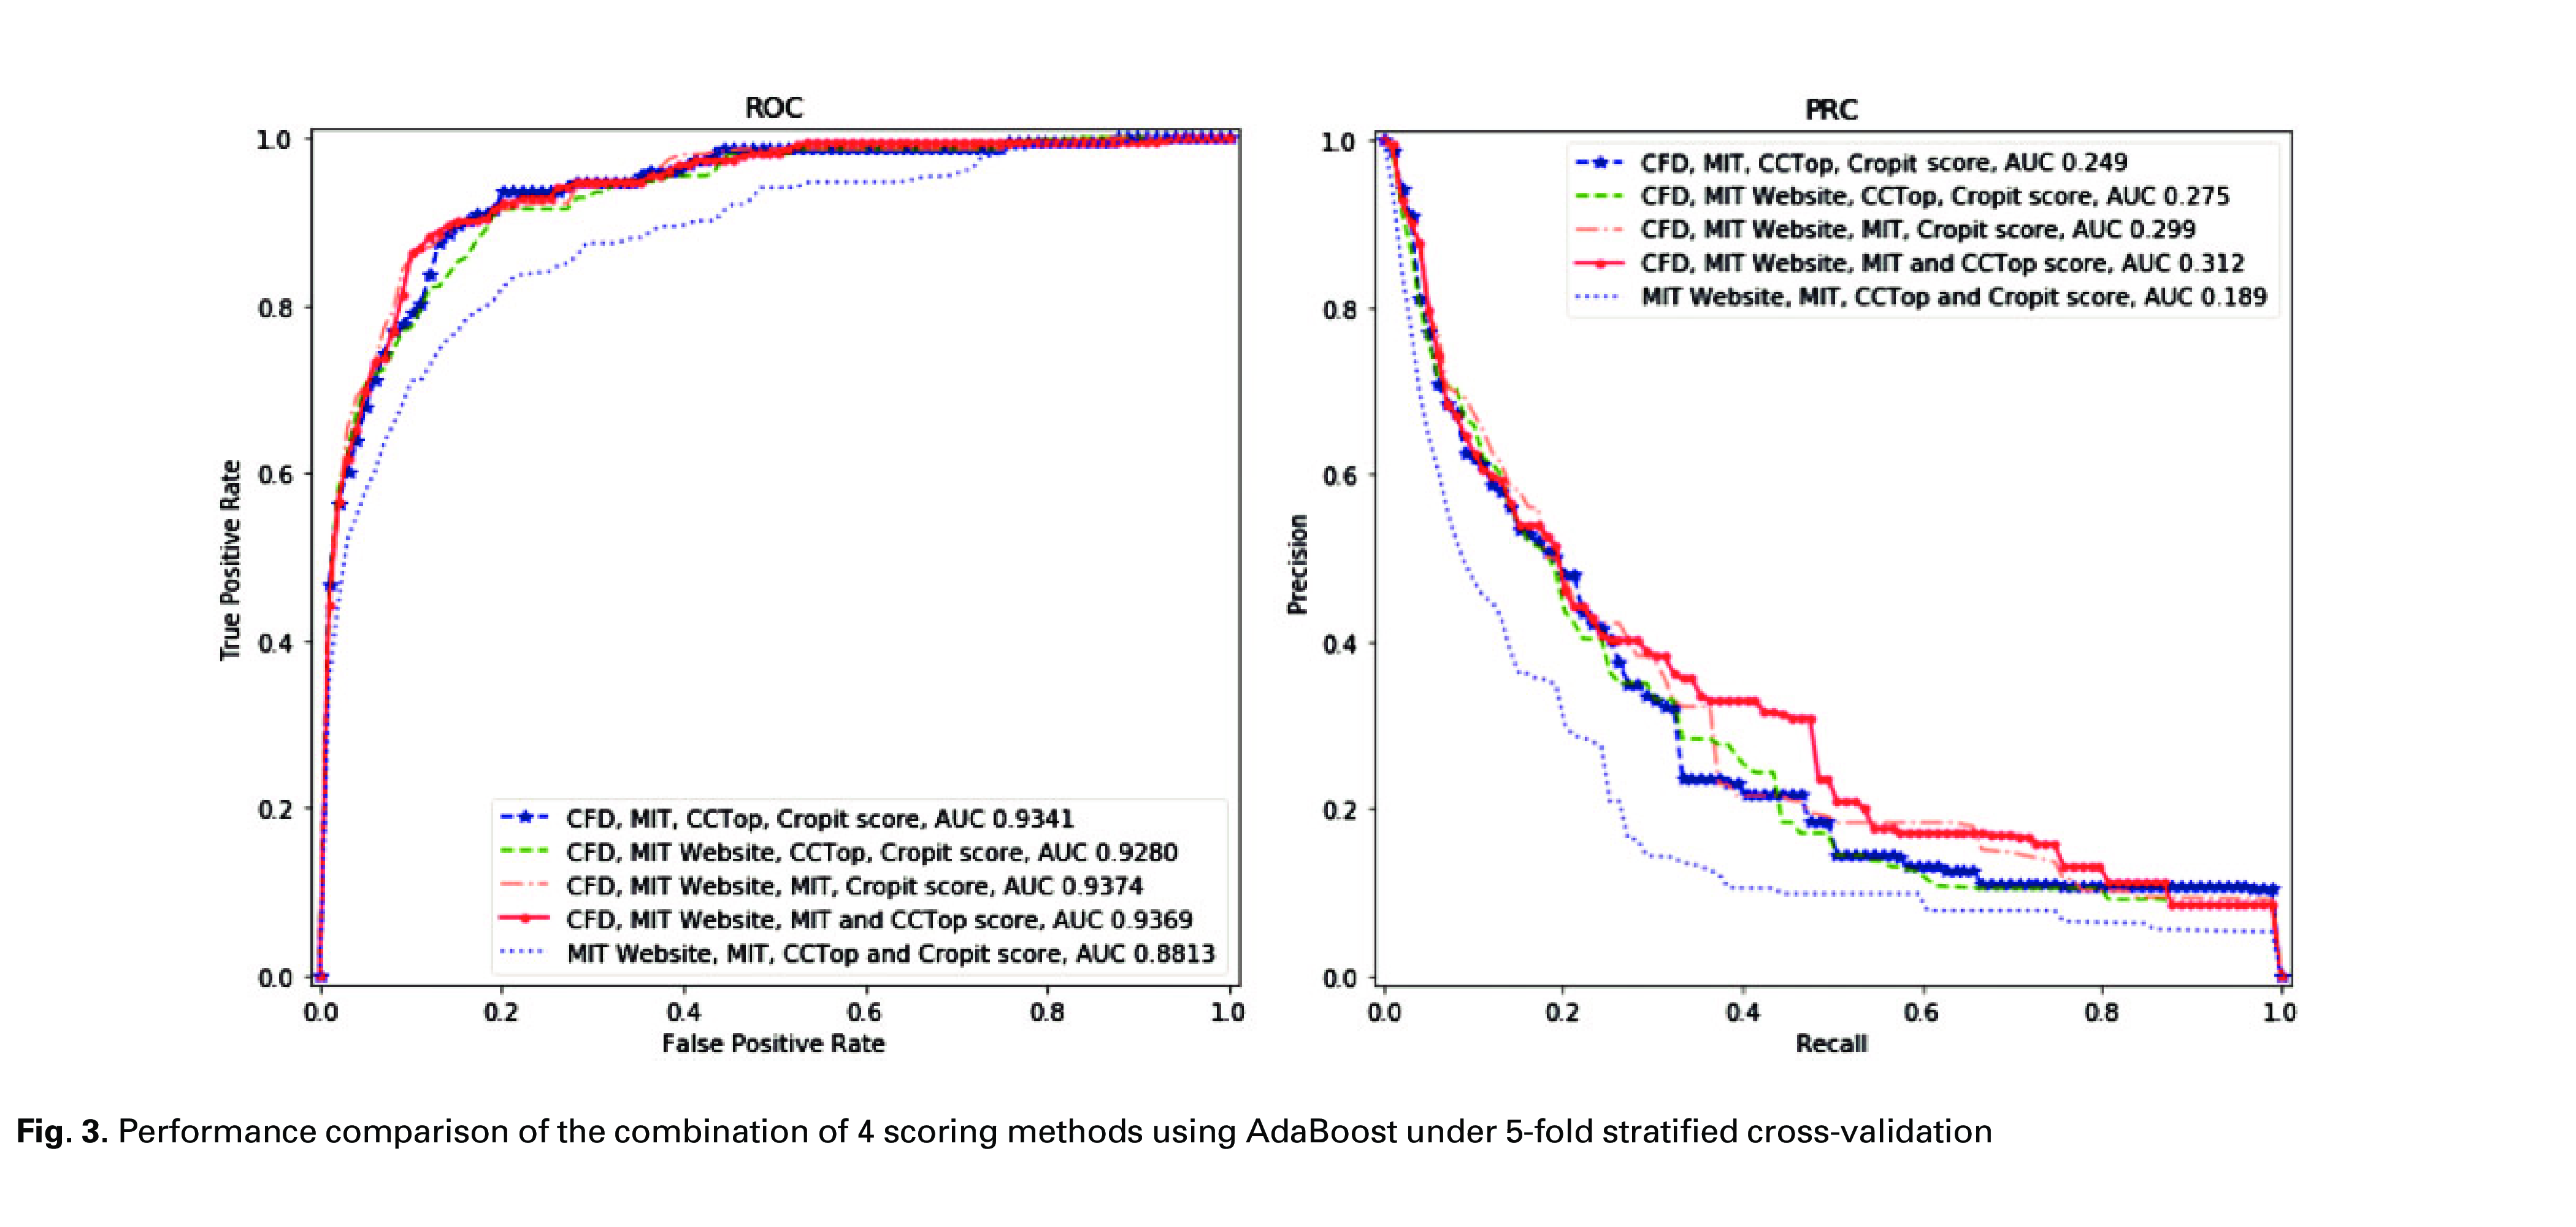

In [17]:
get_fig_from_page(4, left=True, full_w=True, top=2350, height=2000)

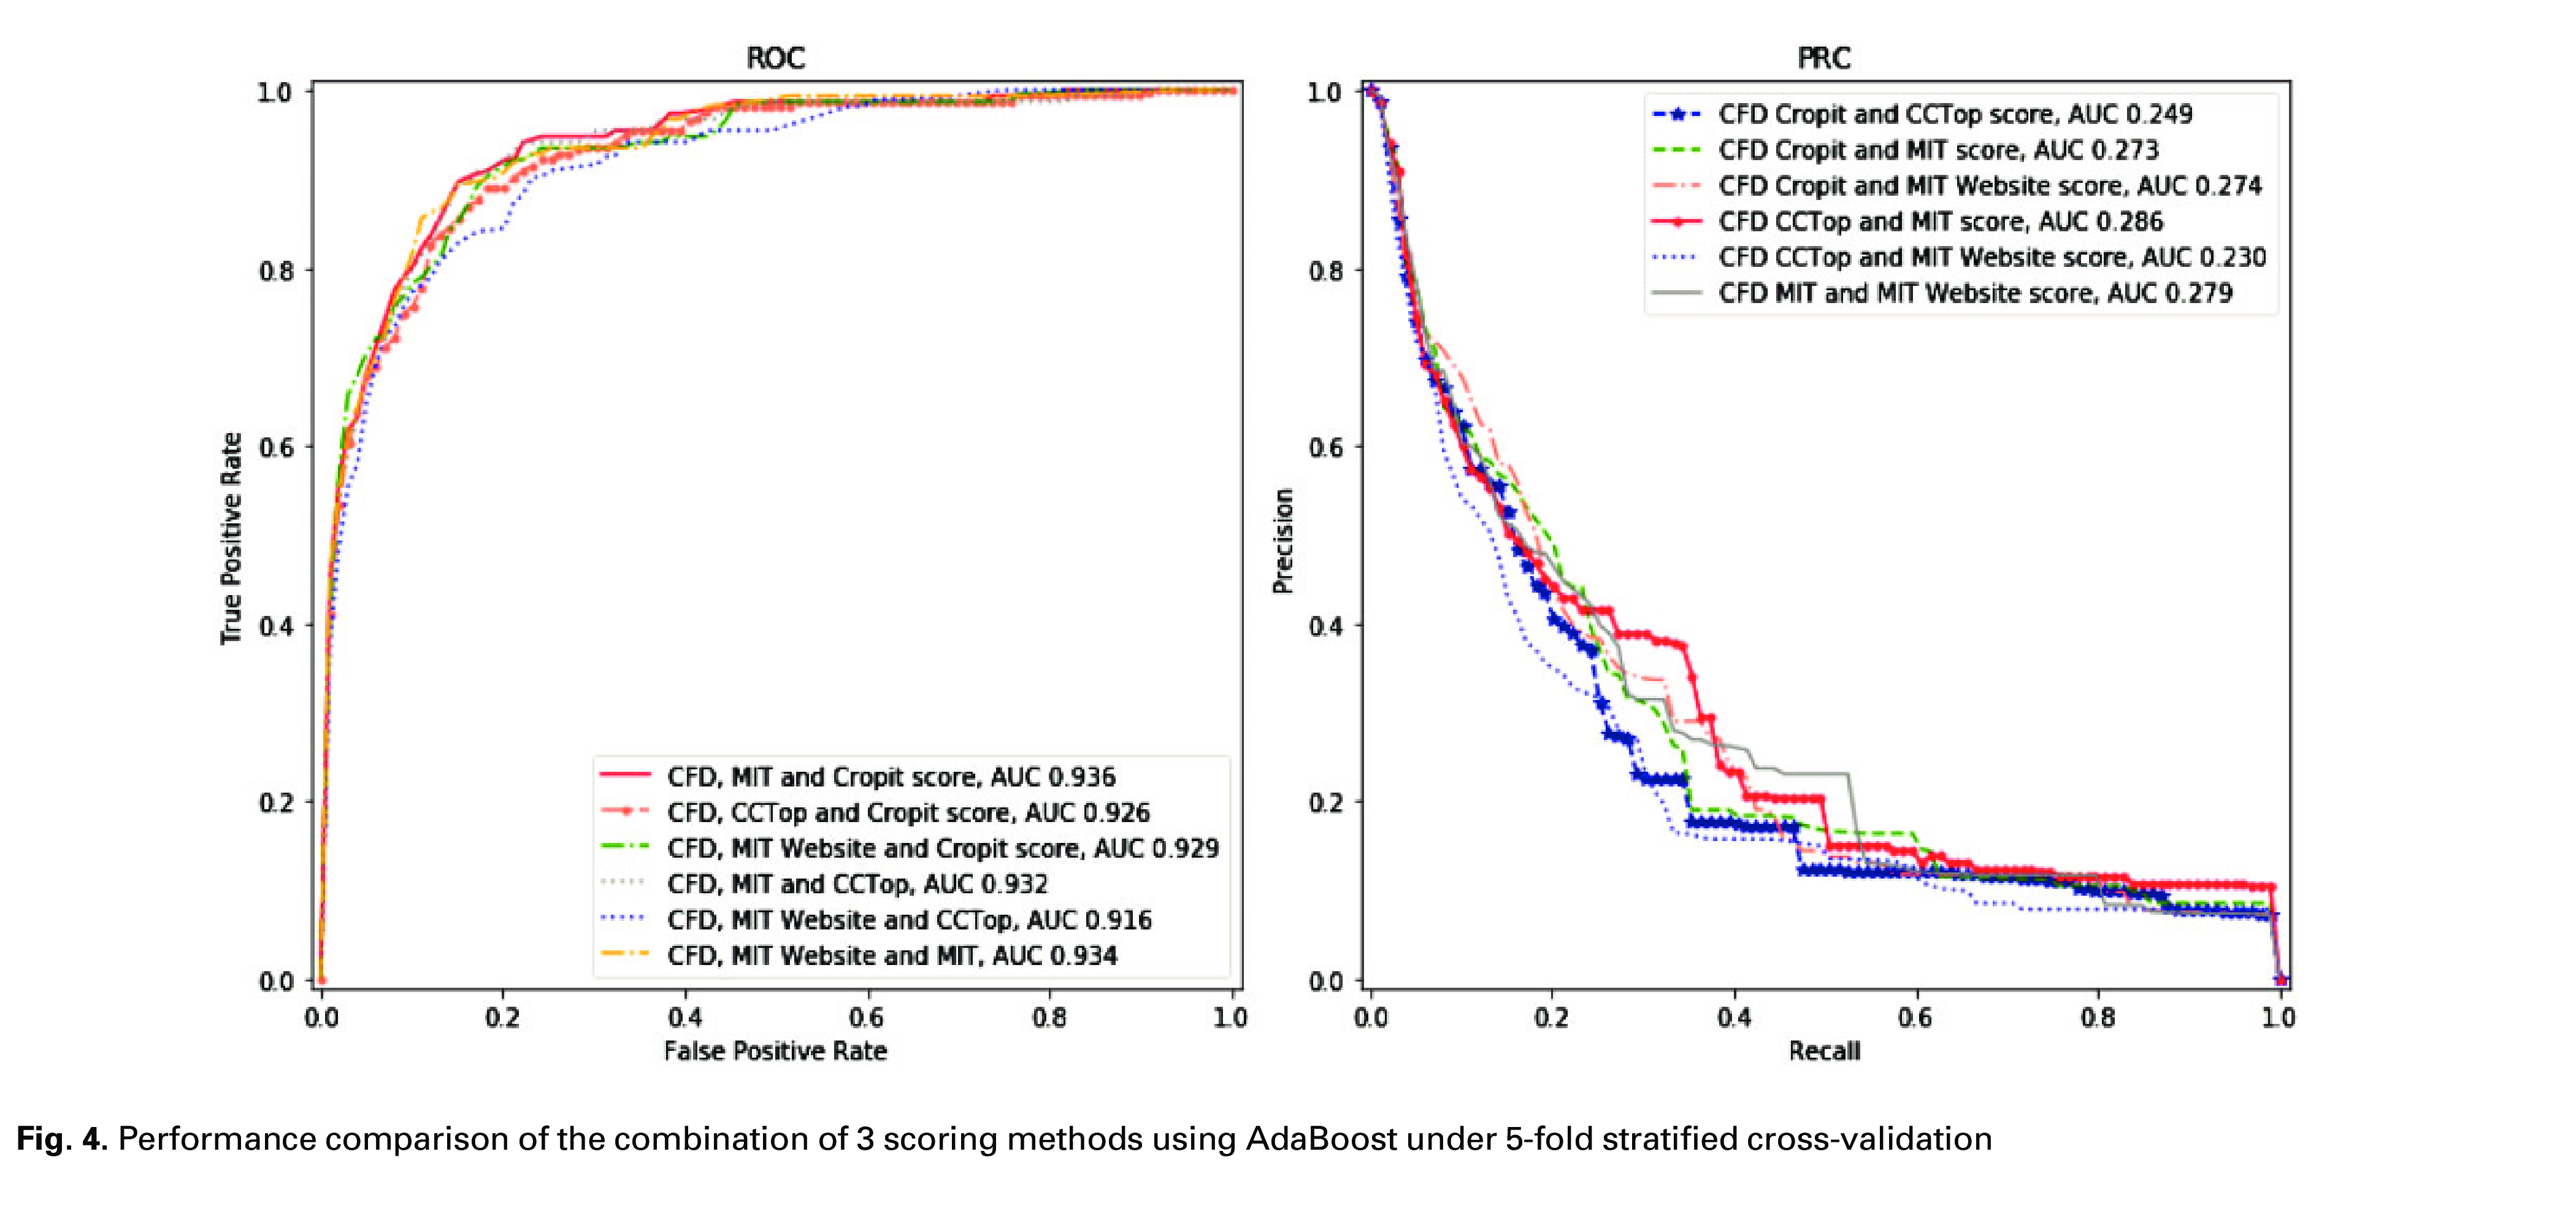

In [18]:
get_fig_from_page(4, left=True, full_w=True, top=4350, height=2000)

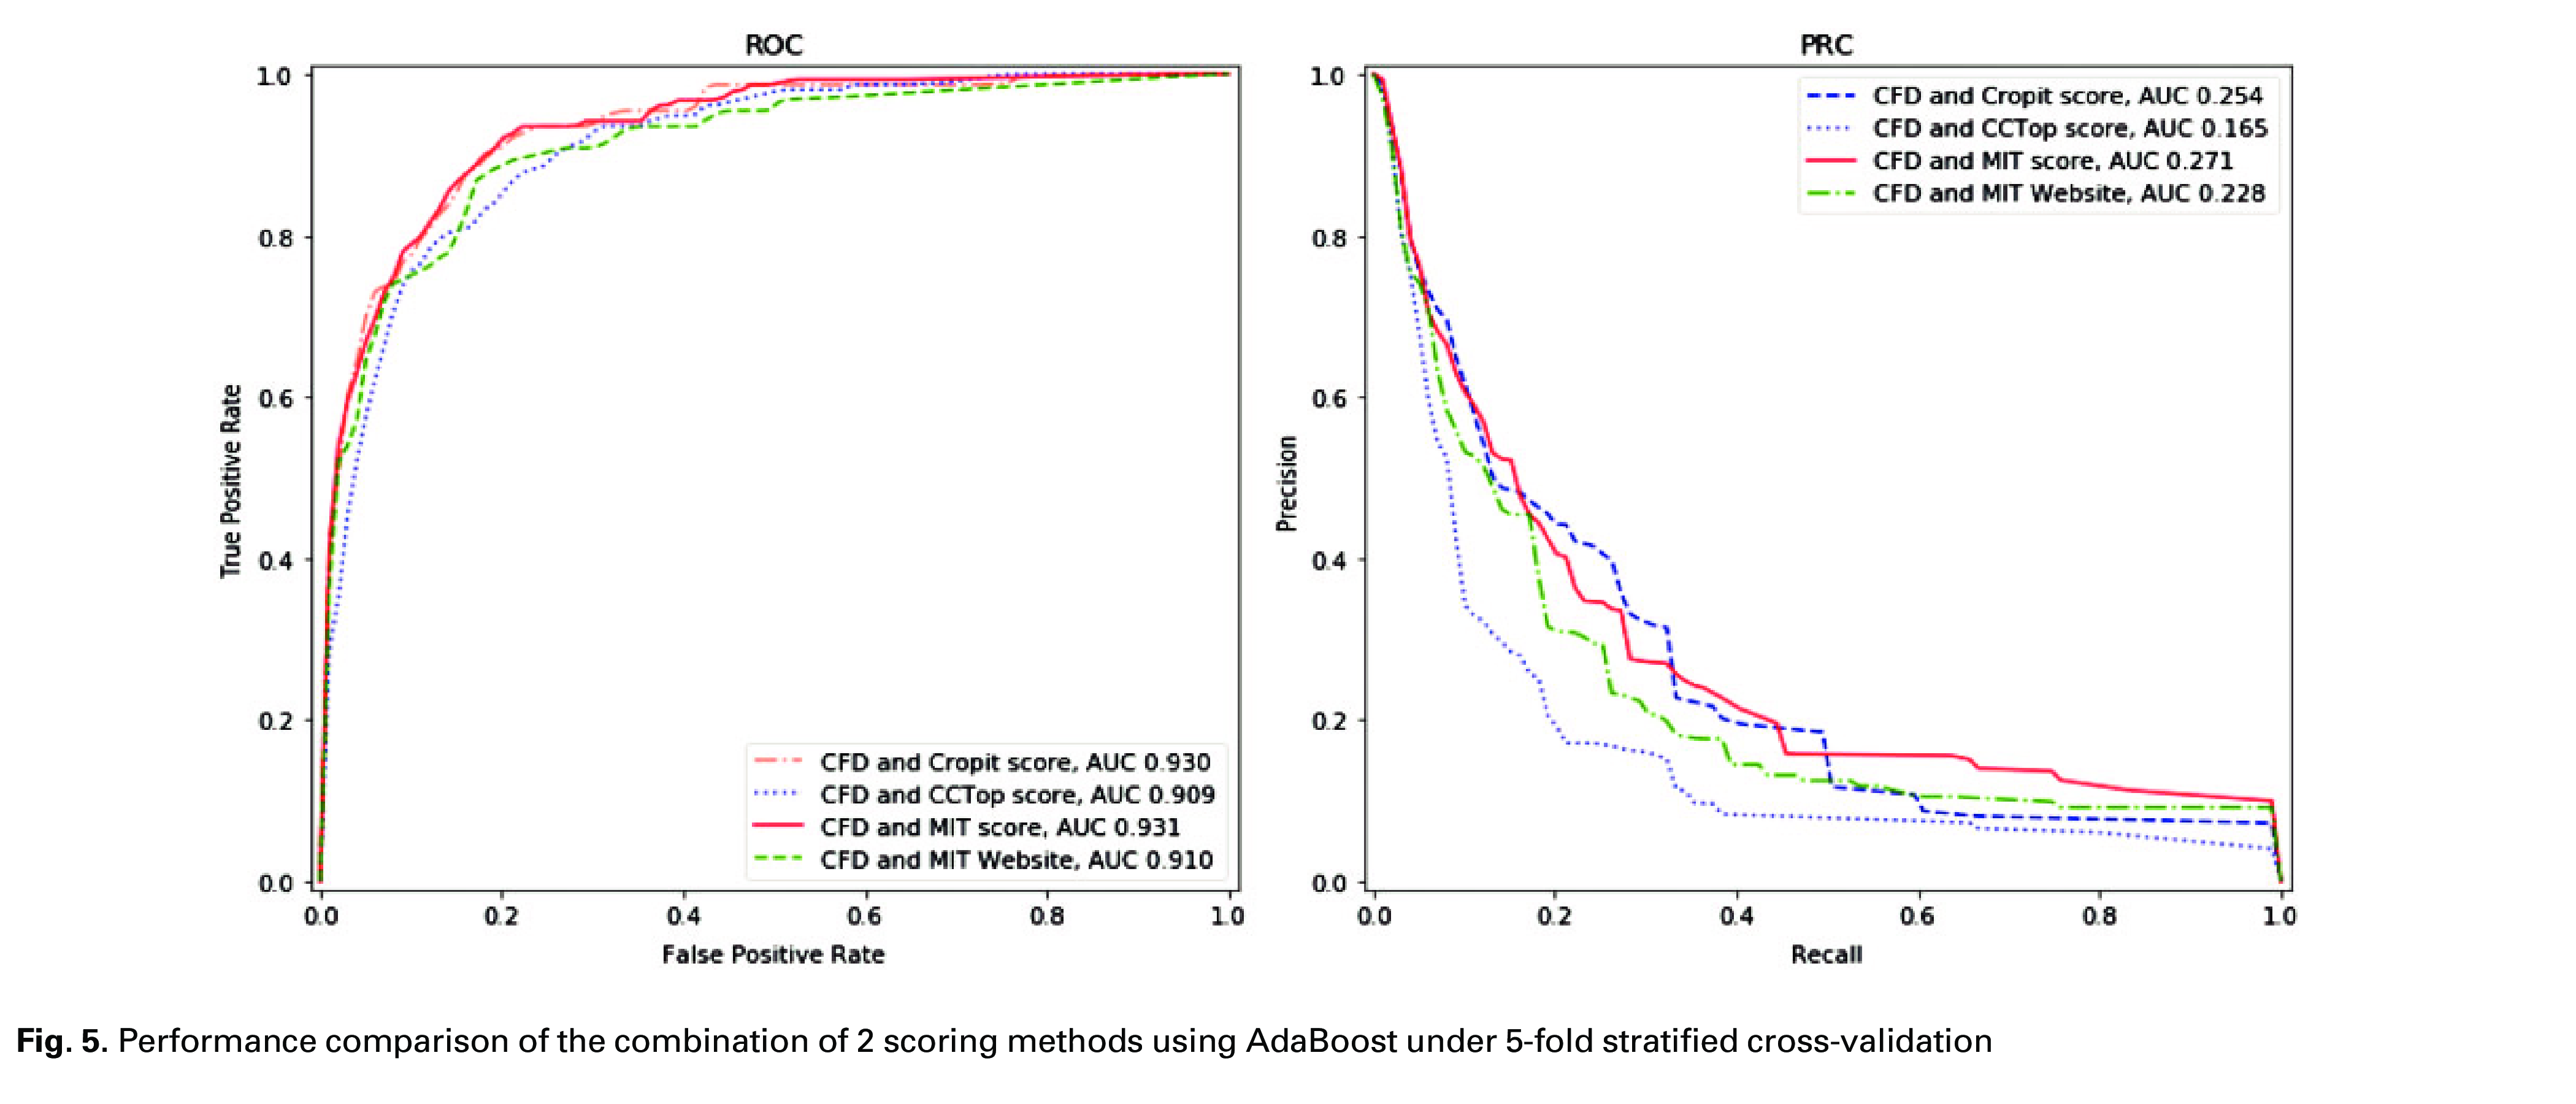

In [19]:
get_fig_from_page(5, left=True, full_w=True, top=450, height=1800)

In [ ]:
for train, test in cv.split(sub_normsocres, Label):
    
    scores = bdt.fit(sub_normsocres[train], Label[train]).decision_function(sub_normsocres[test])
    #scores = svc.fit(sub_normsocres[train], Label[train]).decision_function(sub_normsocres[test])
    #scores = svc1.fit(sub_normsocres[train], Label[train]).decision_function(sub_normsocres[test])
    #scores = dt.fit(sub_normsocres[train], Label[train]).predict_proba(sub_normsocres[test])[:, 1]
    #scores = rf.fit(sub_normsocres[train], Label[train]).predict_proba(sub_normsocres[test])[:, 1]
    #scores = mlp.fit(sub_normsocres[train], Label[train]).predict_proba(sub_normsocres[test])[:, 1]
    
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Label[test], scores)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i += 1

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.4f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

In [ ]:
plt.figure(figsize=(7, 7)) 
LabelAda = "AdaBoost, AUC %.4f" % meanaucAda
LabelRF = "RandomForest, AUC %.4f" % meanaucRF
LabelDT = "DecisionTree, AUC %.4f" % meanaucDT
LabelSVC = "SVC, AUC %.4f" % meanaucsvc
LabelMLP = "MLP, AUC %.4f" % meanaucMLP

plt.plot(mean_fpr, meanAda, color='r', label= LabelAda, ls = "--", marker ='*')
plt.plot(mean_fpr, meanMLP, color='grey', label= LabelMLP, ls = ":")
plt.plot(mean_fpr, meanRF, color='darkblue', label= LabelRF, ls = "--")
plt.plot(mean_fpr, meanDT, color='green', label= LabelDT, ls = "-.")
plt.plot(mean_fpr, meansvc, color='b', label= LabelSVC, ls = ":", marker ='.')

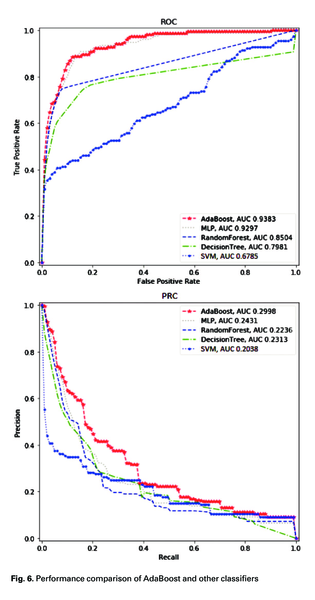

In [30]:
get_fig_from_page(5, left=False, full_w=False, top=2250, height=4000, shrink=0.15)

# Case study

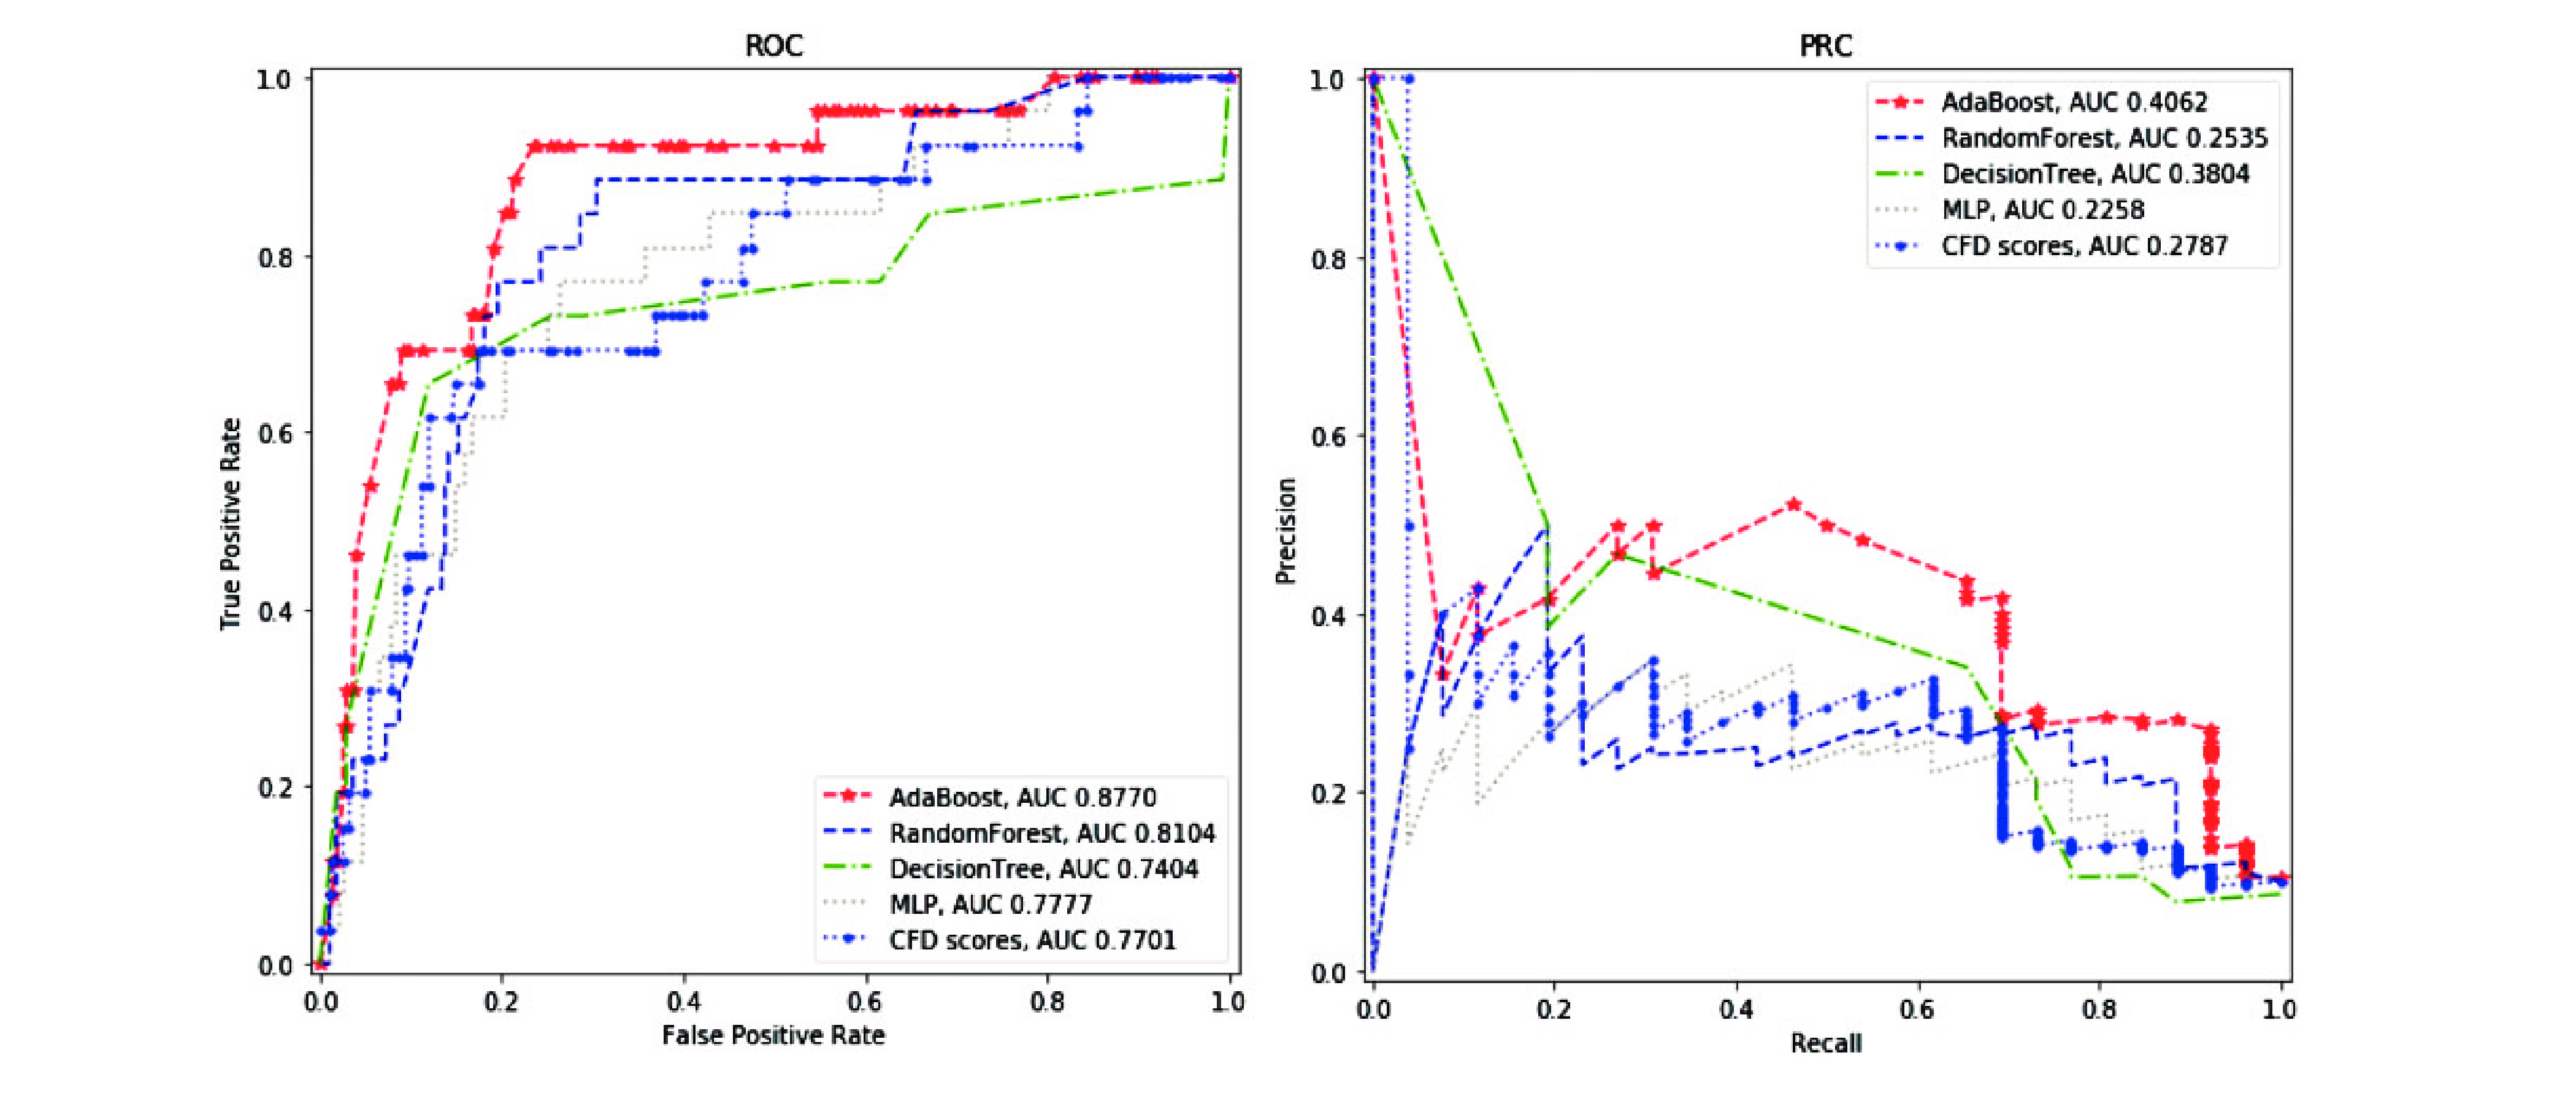

In [21]:
get_fig_from_page(6, left=True, full_w=True, top=450, height=1800)

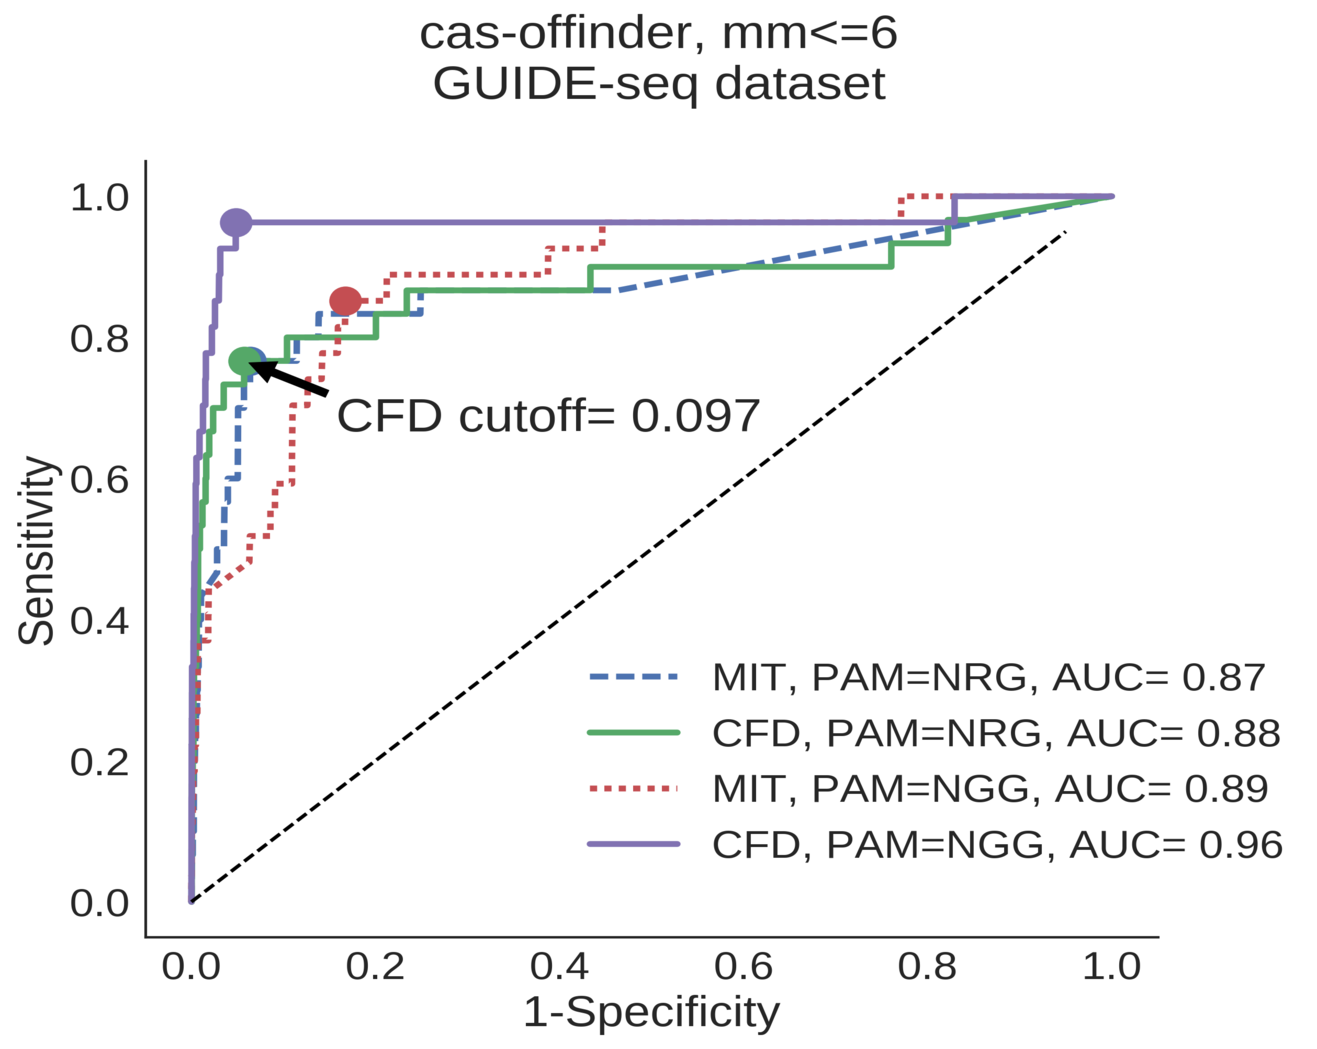

In [35]:
crop_fig('20171113_8gRNAs_GUIDEseq_CAS_3K.png', 1200)

# Discussion

## What other benchmark sutdies we could do to improve the ensemble models?
## What other machine learning algorithm we could use to compare with the proposed ensemble model in this study?
## Brainstorm: How would you design a better method to get the "rule of binding/cleaving" for CRISPR/Cas9 that outcompetes CFD matrix? 